In [1]:
import pandas as pd
df = pd.read_csv('.\\datasets\\BTC-Daily.csv')

In [2]:
df['c_date'] = pd.to_datetime(df['date'])
df_2020 = df[df['c_date'].dt.year == 2020]
df_2021 = df[df['c_date'].dt.year == 2021]

In [3]:
df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,c_date
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06,2022-03-01
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08,2022-02-28
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07,2022-02-27
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07,2022-02-26
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07,2022-02-25
...,...,...,...,...,...,...,...,...,...,...
2646,1417478400,2014-12-02 00:00:00,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03,2014-12-02
2647,1417392000,2014-12-01 00:00:00,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03,2014-12-01
2648,1417305600,2014-11-30 00:00:00,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03,2014-11-30
2649,1417219200,2014-11-29 00:00:00,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03,2014-11-29


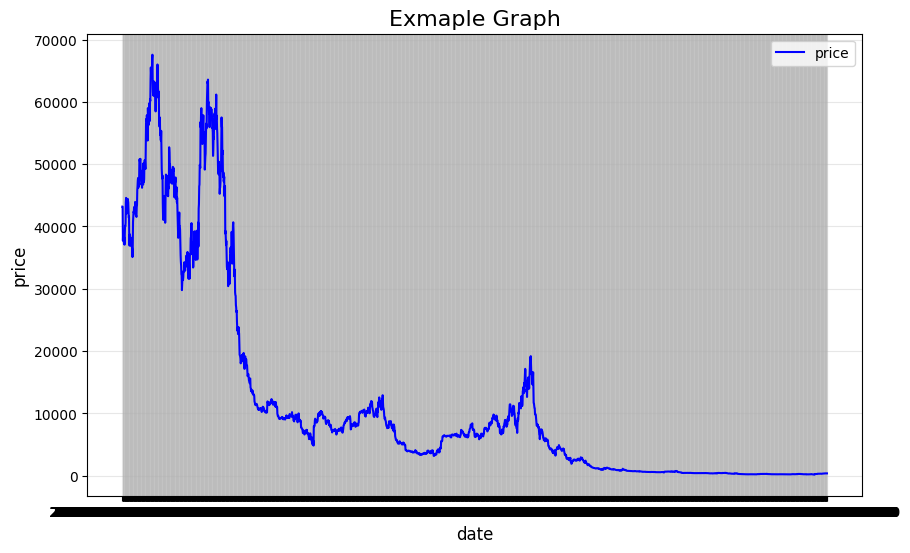

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

plt.plot(df['date'],df['close'], label='price', color='blue', linestyle='-') 
plt.title('Exmaple Graph', fontsize=16) 
plt.xlabel('date', fontsize=12)           
plt.ylabel('price', fontsize=12)   
plt.grid(True, alpha=0.3) 
plt.legend() 

plt.show()


In [7]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

scaler = MinMaxScaler()

df_2020['close_normalized'] = scaler.fit_transform(df_2020[['close']])

df_2021_test = pd.concat([df_2021, df_2020[0:5]])
df_2021_test['close_normalized'] = scaler.fit_transform(df_2021_test[['close']])

def create_sequences(data, sequence_length):
    sequences = []
    labels = []

    for i in range(len(data) - sequence_length):
      if i + sequence_length >= len(data):
        break

      sequences.append(data[i:i+sequence_length])
      labels.append(data[i+sequence_length])

    return np.array(sequences), np.array(labels)

sequence_length = 5  # Adjust this parameter to define the length of the input sequences
num_features = 1  # We are using only the 'price' column, so the number of features is 1
batch_size = 1
epochs = 10

# Create sequences and labels
train_sequences, train_labels = create_sequences(df_2020['close_normalized'].values, sequence_length)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, num_features)))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(train_sequences, train_labels, batch_size=batch_size, epochs=epochs, verbose=1)

# Predict ปี 2021
test_sequences, test_labels = create_sequences(df_2021_test['close_normalized'].values, sequence_length)

# Use the model to predict Bitcoin prices
predicted_prices_normalized = model.predict(test_sequences)
predicted_prices = scaler.inverse_transform(predicted_prices_normalized)

df_2021['predicted_prices_lstm'] = predicted_prices

C:\Users\home\AppData\Local\Temp\ipykernel_23380\1145408369.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['close_normalized'] = scaler.fit_transform(df_2020[['close']])


Epoch 1/10

361/361 [==============================] - 2s 2ms/step - loss: 0.0053
Epoch 2/10
361/361 [==============================] - 1s 2ms/step - loss: 8.9919e-04
Epoch 3/10
361/361 [==============================] - 1s 2ms/step - loss: 7.7507e-04
Epoch 4/10
361/361 [==============================] - 1s 2ms/step - loss: 8.2106e-04
Epoch 5/10
361/361 [==============================] - 1s 2ms/step - loss: 6.7155e-04
Epoch 6/10
361/361 [==============================] - 1s 2ms/step - loss: 6.7503e-04
Epoch 7/10
361/361 [==============================] - 1s 2ms/step - loss: 6.5481e-04
Epoch 8/10
361/361 [==============================] - 1s 2ms/step - loss: 6.6630e-04
Epoch 9/10
361/361 [==============================] - 1s 2ms/step - loss: 6.6603e-04
Epoch 10/10
12/12 [==============================] - 0s 1ms/step


C:\Users\home\AppData\Local\Temp\ipykernel_23380\1145408369.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['predicted_prices_lstm'] = predicted_prices


In [9]:
import math
import random

import matplotlib.pyplot as plt
import pandas_datareader as data_reader
import tensorflow as tf

from tqdm import tqdm_notebook, tqdm
from collections import deque

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

class AI_Trader():

  def __init__(self, state_size, action_space=3, model_name="AITrader"):
    self.state_size = state_size
    self.action_space = action_space
    self.memory = deque(maxlen=2000)
    self.inventory = []
    self.model_name = model_name
    self.model = self.model_builder()

    self.gamma = 0.95
    self.epsilon = 1.0
    self.epsilon_final = 0.01
    self.epsilon_decay = 0.995

  def model_builder(self):
    model = Sequential()
    model.add(Dense(units=32, activation='relu', input_dim=self.state_size))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=self.action_space, activation='linear'))
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))
    return model

  def trade(self, state):
    if random.random() <= self.epsilon:
      return random.randrange(self.action_space)

    return np.argmax(self.model.predict(state)[0])

  def batch_train(self, batch_size):
    batch = []
    for i in range(len(self.memory) - batch_size + 1, len(self.memory)):
      batch.append(self.memory[i])

    for state, action, reward, next_state, done in batch:
      reward = reward
      if not done:
        reward = reward + self.gamma * np.amax(self.model.predict(next_state)[0])

      target = self.model.predict(state)
      target[0][action] = reward

      self.model.fit(state, target, epochs=1, verbose=0)

    if self.epsilon > self.epsilon_final:
      self.epsilon *= self.epsilon_decay

In [11]:
data = list(df_2020['close'])[::-1]
data_samples = len(data) - 1

window_size = 10
episodes = 1

batch_size = 32

trader = AI_Trader(window_size)
trader.model.summary()

def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

def state_creator(data, timestep, window_size):
  starting_id = timestep - window_size + 1

  if starting_id >= 0:
    windowed_data = data[starting_id:timestep+1]
  else:
    windowed_data = (-1*starting_id) * [data[0]] + list(data[0:timestep+1])

  state = []

  for i in range(window_size -1):
    state.append(sigmoid(windowed_data[i+1] - windowed_data[i]))

  return np.array([state])

# Train จากปี 2020
for episode in range(1, episodes + 1):

  print("Episode: {}/{}".format(episode, episodes))

  state = state_creator(data, 0, window_size + 1)

  total_profit = 0
  trader.inventory = []

  for t in tqdm(range(data_samples)):

    action = trader.trade(state)

    next_state = state_creator(data, t+1, window_size + 1)
    reward = 0

    if action == 1: #Buying
      trader.inventory.append(data[t])
      print("AI Trader bought: ", data[t])

    elif action == 2 and len(trader.inventory) > 0: #Selling
      buy_price = trader.inventory.pop(0)

      reward = max(data[t] - buy_price, 0)
      total_profit += data[t] - buy_price
      print("AI Trader sold: ", data[t], " Profit: " + str(data[t] - buy_price))

    if t == data_samples - 1:
      done = True
    else:
      done = False

    trader.memory.append((state, action, reward, next_state, done))

    state = next_state

    if done:
      print('=== Total profit = ', total_profit)

    if len(trader.memory) > batch_size:
      trader.batch_train(batch_size)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                352       
                                                                 
 dense_7 (Dense)             (None, 64)                2112      
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dense_9 (Dense)             (None, 3)                 387       
                                                                 
Total params: 11171 (43.64 KB)
Trainable params: 11171 (43.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Episode: 1/1


  0%|          | 0/365 [00:00<?, ?it/s]

AI Trader bought:  7178.68
AI Trader bought:  7338.91
AI Trader sold:  7344.48  Profit: 165.79999999999927
AI Trader bought:  7356.7
AI Trader sold:  7762.74  Profit: 423.8299999999999
AI Trader sold:  8044.44  Profit: 687.7399999999998
AI Trader bought:  8200.0
AI Trader bought:  8016.22
AI Trader bought:  8180.76
AI Trader sold:  8105.01  Profit: -94.98999999999978
AI Trader bought:  8813.04
AI Trader sold:  8809.17  Profit: 792.9499999999998
AI Trader sold:  8710.15  Profit: 529.3899999999994
AI Trader sold:  8892.63  Profit: 79.58999999999833
AI Trader bought:  8717.89
AI Trader sold:  8378.44  Profit: -339.4499999999989
AI Trader bought:  8422.13
AI Trader sold:  8329.5  Profit: -92.6299999999992
AI Trader bought:  8894.54
AI Trader sold:  9400.0  Profit: 505.4599999999991
AI Trader bought:  9289.18
AI Trader sold:  9327.85  Profit: 38.67000000000007
1/1 [==============================] - 0s 17ms/step


  9%|▉         | 33/365 [00:05<00:54,  6.04it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 34/365 [00:10<01:57,  2.82it/s]

1/1 [==============================] - 0s 16ms/step


 10%|▉         | 35/365 [00:14<03:17,  1.67it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 36/365 [00:20<05:21,  1.02it/s]

AI Trader bought:  9754.63
1/1 [==============================] - 0s 18ms/step


 10%|█         | 37/365 [00:26<07:44,  1.42s/it]

AI Trader sold:  9803.42  Profit: 48.79000000000087
1/1 [==============================] - 0s 23ms/step


 10%|█         | 38/365 [00:31<10:33,  1.94s/it]

1/1 [==============================] - 0s 16ms/step


 11%|█         | 39/365 [00:36<12:58,  2.39s/it]

AI Trader bought:  10173.97
1/1 [==============================] - 0s 17ms/step


 11%|█         | 40/365 [00:42<15:33,  2.87s/it]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 41/365 [00:47<18:07,  3.36s/it]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 42/365 [00:52<19:45,  3.67s/it]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 43/365 [00:57<22:04,  4.11s/it]

1/1 [==============================] - 0s 23ms/step
AI Trader sold:  10228.67  Profit: 54.70000000000073
1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 44/365 [01:04<25:28,  4.76s/it]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 45/365 [01:10<27:41,  5.19s/it]

AI Trader bought:  9899.78
1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 46/365 [01:16<28:43,  5.40s/it]

AI Trader sold:  9912.89  Profit: 13.109999999998763
1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 47/365 [01:22<29:35,  5.58s/it]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 48/365 [01:28<30:03,  5.69s/it]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 49/365 [01:34<30:29,  5.79s/it]

1/1 [==============================] - 0s 27ms/step


 14%|█▎        | 50/365 [01:41<31:54,  6.08s/it]

AI Trader bought:  9612.76
1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 51/365 [01:48<33:01,  6.31s/it]

AI Trader bought:  9696.13
1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 52/365 [01:54<32:52,  6.30s/it]

AI Trader bought:  9668.13
1/1 [==============================] - 0s 19ms/step


 15%|█▍        | 53/365 [02:00<31:18,  6.02s/it]

1/1 [==============================] - 0s 18ms/step


 15%|█▍        | 54/365 [02:05<30:02,  5.80s/it]

AI Trader sold:  9652.58  Profit: 39.81999999999971
1/1 [==============================] - 0s 21ms/step


 15%|█▌        | 55/365 [02:12<31:22,  6.07s/it]

AI Trader bought:  9305.4
1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 56/365 [02:17<29:55,  5.81s/it]

AI Trader bought:  8779.36
1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 57/365 [02:22<28:47,  5.61s/it]

AI Trader bought:  8816.5
1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 58/365 [02:27<28:15,  5.52s/it]

AI Trader bought:  8703.84
1/1 [==============================] - 0s 19ms/step


 16%|█▌        | 59/365 [02:32<27:44,  5.44s/it]

AI Trader sold:  8527.74  Profit: -1168.3899999999994
1/1 [==============================] - 0s 21ms/step


 16%|█▋        | 60/365 [02:38<27:35,  5.43s/it]

AI Trader bought:  8528.95
1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 61/365 [02:43<27:16,  5.38s/it]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 62/365 [02:48<26:56,  5.34s/it]

AI Trader bought:  8755.45
1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 63/365 [02:54<26:46,  5.32s/it]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 64/365 [02:59<26:36,  5.30s/it]

AI Trader bought:  9066.65
1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 65/365 [03:04<26:24,  5.28s/it]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 66/365 [03:10<26:38,  5.35s/it]

AI Trader bought:  8893.93
1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 67/365 [03:16<27:25,  5.52s/it]

AI Trader sold:  8033.7  Profit: -1634.4299999999994
1/1 [==============================] - 0s 17ms/step


 19%|█▊        | 68/365 [03:21<26:48,  5.41s/it]

AI Trader bought:  7936.25
1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 69/365 [03:26<26:25,  5.36s/it]

AI Trader sold:  7885.92  Profit: -1419.4799999999996
1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 70/365 [03:31<26:14,  5.34s/it]

1/1 [==============================] - 0s 22ms/step
AI Trader sold:  7934.57  Profit: -844.7900000000009
1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 71/365 [03:37<26:17,  5.37s/it]

AI Trader sold:  4841.67  Profit: -3974.83
1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 72/365 [03:42<26:06,  5.35s/it]

1/1 [==============================] - 0s 18ms/step
AI Trader sold:  5622.74  Profit: -3081.1000000000004
1/1 [==============================] - 0s 21ms/step


 20%|██        | 73/365 [03:47<26:00,  5.35s/it]

1/1 [==============================] - 0s 18ms/step
AI Trader sold:  5169.37  Profit: -3359.580000000001
1/1 [==============================] - 0s 21ms/step


 20%|██        | 74/365 [03:53<25:50,  5.33s/it]

AI Trader sold:  5343.64  Profit: -3411.8100000000004
1/1 [==============================] - 0s 18ms/step


 21%|██        | 75/365 [03:58<25:45,  5.33s/it]

AI Trader bought:  5033.42
1/1 [==============================] - 0s 18ms/step


 21%|██        | 76/365 [04:03<25:36,  5.32s/it]

AI Trader bought:  5324.99
1/1 [==============================] - 0s 21ms/step


 21%|██        | 77/365 [04:09<25:38,  5.34s/it]

1/1 [==============================] - 0s 18ms/step


 21%|██▏       | 78/365 [04:14<25:28,  5.33s/it]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 79/365 [04:20<26:35,  5.58s/it]

AI Trader bought:  6210.14
1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 80/365 [04:25<26:04,  5.49s/it]

AI Trader bought:  6187.78
1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 81/365 [04:31<25:55,  5.48s/it]

AI Trader bought:  5813.15
1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 82/365 [04:36<25:36,  5.43s/it]

1/1 [==============================] - 0s 21ms/step
AI Trader bought:  6493.51
1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 83/365 [04:42<25:37,  5.45s/it]

1/1 [==============================] - 0s 19ms/step
AI Trader bought:  6768.64
1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 84/365 [04:47<25:49,  5.51s/it]

AI Trader sold:  6692.22  Profit: -2374.4299999999994
1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 85/365 [04:53<25:32,  5.47s/it]

AI Trader bought:  6760.72
1/1 [==============================] - 0s 19ms/step


 24%|██▎       | 86/365 [04:58<25:16,  5.44s/it]

AI Trader sold:  6376.03  Profit: -2517.9000000000005
1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 87/365 [05:03<25:08,  5.43s/it]

AI Trader bought:  6253.08
1/1 [==============================] - 0s 17ms/step


 24%|██▍       | 88/365 [05:09<25:04,  5.43s/it]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 89/365 [05:14<24:48,  5.39s/it]

1/1 [==============================] - 0s 19ms/step
AI Trader sold:  6407.77  Profit: -1528.4799999999996
1/1 [==============================] - 0s 17ms/step


 25%|██▍       | 90/365 [05:19<24:34,  5.36s/it]

1/1 [==============================] - 0s 19ms/step
AI Trader sold:  6421.14  Profit: 1387.7200000000003
1/1 [==============================] - 0s 18ms/step


 25%|██▍       | 91/365 [05:26<25:37,  5.61s/it]

AI Trader bought:  6652.07
1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 92/365 [05:31<25:39,  5.64s/it]

1/1 [==============================] - 0s 21ms/step
AI Trader sold:  6801.99  Profit: 1477.0
1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 93/365 [05:37<25:23,  5.60s/it]

AI Trader bought:  6742.57
1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 94/365 [05:42<25:07,  5.56s/it]

AI Trader sold:  6879.61  Profit: 669.4699999999993
1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 95/365 [05:48<24:47,  5.51s/it]

AI Trader bought:  6775.2
1/1 [==============================] - 0s 19ms/step


 26%|██▋       | 96/365 [05:53<24:43,  5.51s/it]

AI Trader bought:  7352.43
1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 97/365 [05:59<24:36,  5.51s/it]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 98/365 [06:04<24:33,  5.52s/it]

AI Trader bought:  7367.36
1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 99/365 [06:10<24:29,  5.52s/it]

AI Trader sold:  7293.93  Profit: 1106.1500000000005
1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 100/365 [06:15<24:11,  5.48s/it]

AI Trader sold:  6877.03  Profit: 1063.88
1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 101/365 [06:21<23:59,  5.45s/it]

AI Trader sold:  6883.18  Profit: 389.6700000000001
1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 102/365 [06:26<24:18,  5.55s/it]

1/1 [==============================] - 0s 26ms/step
AI Trader sold:  6908.24  Profit: 139.59999999999945
1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 103/365 [06:32<24:44,  5.67s/it]

1/1 [==============================] - 0s 21ms/step
AI Trader sold:  6864.22  Profit: 103.5
1/1 [==============================] - 0s 19ms/step


 28%|██▊       | 104/365 [06:38<24:27,  5.62s/it]

AI Trader sold:  6879.75  Profit: 626.6700000000001
1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 105/365 [06:43<24:18,  5.61s/it]

AI Trader bought:  6619.0
1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 106/365 [06:49<24:00,  5.56s/it]

AI Trader sold:  7111.67  Profit: 459.60000000000036
1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 107/365 [06:54<23:52,  5.55s/it]

1/1 [==============================] - 0s 19ms/step
AI Trader sold:  7024.19  Profit: 281.6199999999999
1/1 [==============================] - 0s 20ms/step


 30%|██▉       | 108/365 [07:00<23:48,  5.56s/it]

AI Trader sold:  7262.26  Profit: 487.0600000000004
1/1 [==============================] - 0s 18ms/step


 30%|██▉       | 109/365 [07:05<23:35,  5.53s/it]

1/1 [==============================] - 0s 26ms/step
AI Trader sold:  7126.4  Profit: -226.03000000000065
1/1 [==============================] - 0s 22ms/step


 30%|███       | 110/365 [07:11<23:35,  5.55s/it]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 111/365 [07:17<23:30,  5.55s/it]

1/1 [==============================] - 0s 20ms/step
AI Trader sold:  6854.98  Profit: -512.3800000000001
1/1 [==============================] - 0s 24ms/step


 31%|███       | 112/365 [07:22<23:21,  5.54s/it]

AI Trader bought:  7137.79
1/1 [==============================] - 0s 20ms/step


 31%|███       | 113/365 [07:28<23:17,  5.55s/it]

AI Trader bought:  7484.58
1/1 [==============================] - 0s 19ms/step


 31%|███       | 114/365 [07:34<24:00,  5.74s/it]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 115/365 [07:39<23:35,  5.66s/it]

AI Trader bought:  7547.56
1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 116/365 [07:45<23:15,  5.60s/it]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 117/365 [07:50<23:16,  5.63s/it]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 118/365 [07:56<22:59,  5.59s/it]

1/1 [==============================] - 0s 19ms/step


 33%|███▎      | 119/365 [08:01<22:39,  5.53s/it]

AI Trader sold:  8790.32  Profit: 2171.3199999999997
1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 120/365 [08:07<22:54,  5.61s/it]

1/1 [==============================] - 0s 19ms/step


 33%|███▎      | 121/365 [08:12<22:30,  5.54s/it]

1/1 [==============================] - 0s 20ms/step
AI Trader sold:  8832.44  Profit: 1694.6500000000005
1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 122/365 [08:18<22:10,  5.47s/it]

AI Trader bought:  8983.79
1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 123/365 [08:23<22:05,  5.48s/it]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 124/365 [08:29<21:57,  5.47s/it]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 125/365 [08:34<21:56,  5.49s/it]

AI Trader sold:  9034.85  Profit: 1550.2700000000004
1/1 [==============================] - 0s 20ms/step


 35%|███▍      | 126/365 [08:40<22:35,  5.67s/it]

AI Trader sold:  9154.32  Profit: 1606.7599999999993
1/1 [==============================] - 0s 20ms/step


 35%|███▍      | 127/365 [08:46<22:30,  5.67s/it]

AI Trader sold:  10000.0  Profit: 1016.2099999999991
1/1 [==============================] - 0s 19ms/step


 35%|███▌      | 128/365 [08:52<22:13,  5.63s/it]

AI Trader bought:  9801.35
1/1 [==============================] - 0s 19ms/step


 35%|███▌      | 129/365 [08:57<21:56,  5.58s/it]

AI Trader sold:  9546.56  Profit: -254.79000000000087
1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 130/365 [09:03<21:46,  5.56s/it]

1/1 [==============================] - 0s 17ms/step


 36%|███▌      | 131/365 [09:08<21:52,  5.61s/it]

AI Trader bought:  8571.98
1/1 [==============================] - 0s 19ms/step


 36%|███▌      | 132/365 [09:14<21:22,  5.51s/it]

AI Trader bought:  8825.46
1/1 [==============================] - 0s 20ms/step


 36%|███▋      | 133/365 [09:19<21:06,  5.46s/it]

1/1 [==============================] - 0s 18ms/step
AI Trader sold:  9315.5  Profit: 743.5200000000004
1/1 [==============================] - 0s 19ms/step


 37%|███▋      | 134/365 [09:24<21:00,  5.46s/it]

1/1 [==============================] - 0s 17ms/step
AI Trader sold:  9793.5  Profit: 968.0400000000009
1/1 [==============================] - 0s 29ms/step


 37%|███▋      | 135/365 [09:30<20:59,  5.47s/it]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 136/365 [09:36<21:06,  5.53s/it]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 137/365 [09:42<21:44,  5.72s/it]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 138/365 [09:47<21:43,  5.74s/it]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 139/365 [09:53<21:24,  5.68s/it]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 140/365 [09:59<21:04,  5.62s/it]

1/1 [==============================] - 0s 18ms/step


 39%|███▊      | 141/365 [10:04<20:55,  5.61s/it]

1/1 [==============================] - 0s 20ms/step


 39%|███▉      | 142/365 [10:10<20:56,  5.64s/it]

1/1 [==============================] - 0s 20ms/step


 39%|███▉      | 143/365 [10:15<20:45,  5.61s/it]

1/1 [==============================] - 0s 20ms/step


 39%|███▉      | 144/365 [10:21<20:50,  5.66s/it]

1/1 [==============================] - 0s 20ms/step


 40%|███▉      | 145/365 [10:27<20:32,  5.60s/it]

1/1 [==============================] - 0s 18ms/step


 40%|████      | 146/365 [10:32<20:13,  5.54s/it]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 147/365 [10:37<19:59,  5.50s/it]

1/1 [==============================] - 0s 18ms/step


 41%|████      | 148/365 [10:43<19:39,  5.44s/it]

1/1 [==============================] - 0s 17ms/step


 41%|████      | 149/365 [10:49<20:16,  5.63s/it]

1/1 [==============================] - 0s 18ms/step


 41%|████      | 150/365 [10:54<19:45,  5.52s/it]

AI Trader bought:  9705.1
1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 151/365 [10:59<19:24,  5.44s/it]

AI Trader sold:  9446.19  Profit: -258.90999999999985
1/1 [==============================] - 0s 19ms/step


 42%|████▏     | 152/365 [11:05<19:07,  5.39s/it]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 153/365 [11:10<19:08,  5.42s/it]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 154/365 [11:15<18:44,  5.33s/it]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 155/365 [11:20<18:32,  5.30s/it]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 156/365 [11:26<18:25,  5.29s/it]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 157/365 [11:31<18:21,  5.30s/it]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 158/365 [11:36<18:24,  5.33s/it]

1/1 [==============================] - 0s 18ms/step


 44%|████▎     | 159/365 [11:42<18:09,  5.29s/it]

AI Trader bought:  9783.0
1/1 [==============================] - 0s 19ms/step


 44%|████▍     | 160/365 [11:47<18:07,  5.31s/it]

AI Trader bought:  9776.84
1/1 [==============================] - 0s 17ms/step


 44%|████▍     | 161/365 [11:53<18:52,  5.55s/it]

AI Trader sold:  9894.32  Profit: 111.31999999999971
1/1 [==============================] - 0s 18ms/step


 44%|████▍     | 162/365 [11:58<18:36,  5.50s/it]

1/1 [==============================] - 0s 21ms/step
AI Trader sold:  9264.26  Profit: -512.5799999999999
1/1 [==============================] - 0s 21ms/step


 45%|████▍     | 163/365 [12:04<18:26,  5.48s/it]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 164/365 [12:09<18:22,  5.49s/it]

1/1 [==============================] - 0s 17ms/step


 45%|████▌     | 165/365 [12:15<18:00,  5.40s/it]

1/1 [==============================] - 0s 21ms/step


 45%|████▌     | 166/365 [12:20<17:51,  5.38s/it]

AI Trader bought:  9435.15
1/1 [==============================] - 0s 18ms/step


 46%|████▌     | 167/365 [12:25<17:33,  5.32s/it]

AI Trader bought:  9530.3
1/1 [==============================] - 0s 20ms/step


 46%|████▌     | 168/365 [12:30<17:18,  5.27s/it]

1/1 [==============================] - 0s 17ms/step
AI Trader bought:  9461.29
1/1 [==============================] - 0s 16ms/step


 46%|████▋     | 169/365 [12:36<17:18,  5.30s/it]

1/1 [==============================] - 0s 18ms/step
AI Trader bought:  9374.78
1/1 [==============================] - 0s 16ms/step


 47%|████▋     | 170/365 [12:41<17:17,  5.32s/it]

AI Trader bought:  9304.32
1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 171/365 [12:46<17:12,  5.32s/it]

1/1 [==============================] - 0s 23ms/step
AI Trader sold:  9355.46  Profit: -79.69000000000051
1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 172/365 [12:52<17:11,  5.34s/it]

1/1 [==============================] - 0s 19ms/step


 47%|████▋     | 173/365 [12:58<17:47,  5.56s/it]

AI Trader bought:  9683.12
1/1 [==============================] - 0s 17ms/step


 48%|████▊     | 174/365 [13:03<17:32,  5.51s/it]

AI Trader sold:  9622.81  Profit: 92.51000000000022
1/1 [==============================] - 0s 18ms/step


 48%|████▊     | 175/365 [13:09<17:24,  5.50s/it]

1/1 [==============================] - 0s 19ms/step


 48%|████▊     | 176/365 [13:14<17:08,  5.44s/it]

1/1 [==============================] - 0s 18ms/step
AI Trader sold:  9239.48  Profit: -221.8100000000013
1/1 [==============================] - 0s 16ms/step


 48%|████▊     | 177/365 [13:19<16:48,  5.36s/it]

AI Trader bought:  9158.26
1/1 [==============================] - 0s 18ms/step


 49%|████▉     | 178/365 [13:24<16:37,  5.34s/it]

1/1 [==============================] - 0s 21ms/step
AI Trader sold:  9009.3  Profit: -365.4800000000014
1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 179/365 [13:30<16:29,  5.32s/it]

1/1 [==============================] - 0s 19ms/step
AI Trader sold:  9118.01  Profit: -186.3099999999995
1/1 [==============================] - 0s 19ms/step


 49%|████▉     | 180/365 [13:35<16:19,  5.30s/it]

1/1 [==============================] - 0s 18ms/step


 50%|████▉     | 181/365 [13:40<16:06,  5.26s/it]

1/1 [==============================] - 0s 17ms/step
AI Trader sold:  9132.96  Profit: -550.1600000000017
1/1 [==============================] - 0s 19ms/step


 50%|████▉     | 182/365 [13:45<16:04,  5.27s/it]

1/1 [==============================] - 0s 17ms/step
AI Trader sold:  9233.38  Profit: 75.11999999999898
1/1 [==============================] - 0s 17ms/step


 50%|█████     | 183/365 [13:51<16:05,  5.30s/it]

AI Trader bought:  9092.92
1/1 [==============================] - 0s 23ms/step


 50%|█████     | 184/365 [13:56<16:02,  5.32s/it]

1/1 [==============================] - 0s 19ms/step
AI Trader sold:  9063.08  Profit: -29.840000000000146
1/1 [==============================] - 0s 42ms/step


 51%|█████     | 185/365 [14:02<16:48,  5.60s/it]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 186/365 [14:10<18:15,  6.12s/it]

AI Trader bought:  9076.82
1/1 [==============================] - 0s 21ms/step


 51%|█████     | 187/365 [14:17<19:16,  6.50s/it]

1/1 [==============================] - 0s 26ms/step
AI Trader sold:  9348.22  Profit: 271.39999999999964
1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 188/365 [14:25<20:10,  6.84s/it]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 189/365 [14:32<20:31,  7.00s/it]

AI Trader bought:  9437.16
1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 190/365 [14:39<20:38,  7.08s/it]

1/1 [==============================] - 0s 24ms/step
AI Trader sold:  9234.9  Profit: -202.26000000000022
1/1 [==============================] - 0s 30ms/step


 52%|█████▏    | 191/365 [14:47<20:44,  7.15s/it]

AI Trader bought:  9283.53
1/1 [==============================] - 0s 29ms/step


 53%|█████▎    | 192/365 [14:54<21:09,  7.34s/it]

1/1 [==============================] - 0s 30ms/step
AI Trader sold:  9238.3  Profit: -45.23000000000138
1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 193/365 [15:02<21:17,  7.43s/it]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 194/365 [15:10<21:25,  7.52s/it]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 195/365 [15:17<21:22,  7.55s/it]

1/1 [==============================] - 0s 26ms/step


 54%|█████▎    | 196/365 [15:25<20:55,  7.43s/it]

AI Trader bought:  9190.07
1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 197/365 [15:32<20:43,  7.40s/it]

AI Trader sold:  9132.87  Profit: -57.19999999999891
1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 198/365 [15:39<20:09,  7.24s/it]

1/1 [==============================] - 0s 25ms/step


 55%|█████▍    | 199/365 [15:45<19:26,  7.03s/it]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 200/365 [15:52<18:59,  6.91s/it]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 201/365 [15:59<18:51,  6.90s/it]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 202/365 [16:06<18:55,  6.97s/it]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 203/365 [16:13<19:03,  7.06s/it]

1/1 [==============================] - 0s 20ms/step


 56%|█████▌    | 204/365 [16:20<18:56,  7.06s/it]

1/1 [==============================] - 0s 20ms/step


 56%|█████▌    | 205/365 [16:27<18:48,  7.06s/it]

1/1 [==============================] - 0s 31ms/step


 56%|█████▋    | 206/365 [16:34<18:24,  6.95s/it]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 207/365 [16:41<18:37,  7.07s/it]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 208/365 [16:48<18:13,  6.97s/it]

AI Trader bought:  11046.19
1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 209/365 [16:55<17:47,  6.85s/it]

1/1 [==============================] - 0s 22ms/step
AI Trader sold:  10939.27  Profit: -106.92000000000007
1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 210/365 [17:02<17:44,  6.87s/it]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 211/365 [17:09<18:12,  7.09s/it]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 212/365 [17:16<17:48,  6.98s/it]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 213/365 [17:23<17:46,  7.01s/it]

1/1 [==============================] - 0s 24ms/step


 59%|█████▊    | 214/365 [17:30<17:29,  6.95s/it]

1/1 [==============================] - 0s 15ms/step


 59%|█████▉    | 215/365 [17:37<17:16,  6.91s/it]

1/1 [==============================] - 0s 20ms/step


 59%|█████▉    | 216/365 [17:43<16:58,  6.84s/it]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 217/365 [17:50<16:48,  6.81s/it]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 218/365 [17:57<17:03,  6.96s/it]

1/1 [==============================] - 0s 20ms/step


 60%|██████    | 219/365 [18:04<16:41,  6.86s/it]

1/1 [==============================] - 0s 25ms/step


 60%|██████    | 220/365 [18:11<16:23,  6.79s/it]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 221/365 [18:17<16:22,  6.82s/it]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 222/365 [18:24<16:23,  6.88s/it]

AI Trader bought:  11895.12
1/1 [==============================] - 0s 21ms/step


 61%|██████    | 223/365 [18:32<16:28,  6.96s/it]

1/1 [==============================] - 0s 26ms/step
AI Trader sold:  11392.64  Profit: -502.4800000000014
1/1 [==============================] - 0s 26ms/step


 61%|██████▏   | 224/365 [18:39<16:47,  7.15s/it]

1/1 [==============================] - 0s 19ms/step


 62%|██████▏   | 225/365 [18:47<16:49,  7.21s/it]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 226/365 [18:54<16:40,  7.20s/it]

AI Trader bought:  11779.77
1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 227/365 [19:01<16:28,  7.16s/it]

1/1 [==============================] - 0s 23ms/step
AI Trader sold:  11852.2  Profit: 72.43000000000029
1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 228/365 [19:08<16:17,  7.13s/it]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 229/365 [19:15<15:58,  7.05s/it]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 230/365 [19:21<15:38,  6.95s/it]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 231/365 [19:28<15:11,  6.80s/it]

1/1 [==============================] - 0s 32ms/step


 64%|██████▎   | 232/365 [19:35<15:08,  6.83s/it]

1/1 [==============================] - 0s 18ms/step


 64%|██████▍   | 233/365 [19:42<15:05,  6.86s/it]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 234/365 [19:49<15:08,  6.94s/it]

1/1 [==============================] - 0s 32ms/step


 64%|██████▍   | 235/365 [19:56<15:16,  7.05s/it]

1/1 [==============================] - 0s 20ms/step


 65%|██████▍   | 236/365 [20:03<14:50,  6.90s/it]

1/1 [==============================] - 0s 32ms/step
AI Trader bought:  11761.8
1/1 [==============================] - 0s 27ms/step


 65%|██████▍   | 237/365 [20:08<13:27,  6.31s/it]

AI Trader sold:  11328.88  Profit: -432.9200000000001
1/1 [==============================] - 0s 28ms/step


 65%|██████▌   | 238/365 [20:15<14:07,  6.67s/it]

1/1 [==============================] - 0s 26ms/step


 65%|██████▌   | 239/365 [20:22<14:21,  6.83s/it]

1/1 [==============================] - 0s 29ms/step
AI Trader bought:  11330.0
1/1 [==============================] - 0s 27ms/step


 66%|██████▌   | 240/365 [20:30<14:39,  7.03s/it]

1/1 [==============================] - 0s 26ms/step
AI Trader bought:  11536.58
1/1 [==============================] - 0s 21ms/step


 66%|██████▌   | 241/365 [20:37<14:39,  7.09s/it]

1/1 [==============================] - 0s 23ms/step
AI Trader sold:  11471.71  Profit: 141.70999999999913
1/1 [==============================] - 0s 22ms/step


 66%|██████▋   | 242/365 [20:44<14:39,  7.15s/it]

1/1 [==============================] - 0s 24ms/step
AI Trader sold:  11708.97  Profit: 172.38999999999942
1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 243/365 [20:52<14:37,  7.19s/it]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 244/365 [20:59<14:45,  7.32s/it]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 245/365 [21:06<14:09,  7.08s/it]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 246/365 [21:13<14:13,  7.17s/it]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 247/365 [21:21<14:20,  7.30s/it]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 248/365 [21:29<14:30,  7.44s/it]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 249/365 [21:36<14:37,  7.57s/it]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 250/365 [21:44<14:33,  7.59s/it]

1/1 [==============================] - 0s 19ms/step


 69%|██████▉   | 251/365 [21:52<14:36,  7.69s/it]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 252/365 [22:00<14:26,  7.67s/it]

1/1 [==============================] - 0s 20ms/step


 69%|██████▉   | 253/365 [22:07<14:24,  7.72s/it]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 254/365 [22:15<14:00,  7.58s/it]

1/1 [==============================] - 0s 26ms/step


 70%|██████▉   | 255/365 [22:22<13:46,  7.51s/it]

1/1 [==============================] - 0s 21ms/step


 70%|███████   | 256/365 [22:29<13:28,  7.42s/it]

AI Trader bought:  10334.78
1/1 [==============================] - 0s 25ms/step


 70%|███████   | 257/365 [22:36<13:15,  7.36s/it]

AI Trader sold:  10675.15  Profit: 340.369999999999
1/1 [==============================] - 0s 22ms/step


 71%|███████   | 258/365 [22:44<13:20,  7.48s/it]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 259/365 [22:52<13:12,  7.48s/it]

1/1 [==============================] - 0s 32ms/step


 71%|███████   | 260/365 [22:59<12:55,  7.38s/it]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 261/365 [23:06<12:38,  7.29s/it]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 262/365 [23:13<12:37,  7.35s/it]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 263/365 [23:21<12:26,  7.32s/it]

AI Trader bought:  10923.5
1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 264/365 [23:28<12:14,  7.27s/it]

1/1 [==============================] - 0s 28ms/step
AI Trader sold:  10411.29  Profit: -512.2099999999991
1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 265/365 [23:35<12:04,  7.24s/it]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 266/365 [23:42<11:56,  7.24s/it]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 267/365 [23:50<11:54,  7.29s/it]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 268/365 [23:57<11:53,  7.36s/it]

1/1 [==============================] - 0s 26ms/step


 74%|███████▎  | 269/365 [24:05<11:46,  7.36s/it]

1/1 [==============================] - 0s 29ms/step


 74%|███████▍  | 270/365 [24:12<11:45,  7.42s/it]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 271/365 [24:20<11:39,  7.44s/it]

1/1 [==============================] - 0s 25ms/step


 75%|███████▍  | 272/365 [24:27<11:32,  7.44s/it]

1/1 [==============================] - 0s 24ms/step


 75%|███████▍  | 273/365 [24:34<11:13,  7.33s/it]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 274/365 [24:41<11:02,  7.28s/it]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 275/365 [24:49<10:55,  7.28s/it]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 276/365 [24:56<10:47,  7.28s/it]

1/1 [==============================] - 0s 30ms/step


 76%|███████▌  | 277/365 [25:03<10:43,  7.32s/it]

AI Trader bought:  10669.63
1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 278/365 [25:10<10:34,  7.29s/it]

1/1 [==============================] - 0s 36ms/step
AI Trader sold:  10795.0  Profit: 125.3700000000008
1/1 [==============================] - 0s 26ms/step


 76%|███████▋  | 279/365 [25:18<10:24,  7.26s/it]

AI Trader bought:  10606.33
1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 280/365 [25:25<10:15,  7.24s/it]

1/1 [==============================] - 0s 32ms/step
AI Trader sold:  10669.14  Profit: 62.80999999999949
1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 281/365 [25:32<10:10,  7.26s/it]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 282/365 [25:40<10:05,  7.30s/it]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 283/365 [25:47<10:07,  7.40s/it]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 284/365 [25:54<09:50,  7.29s/it]

1/1 [==============================] - 0s 17ms/step


 78%|███████▊  | 285/365 [26:01<09:32,  7.16s/it]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 286/365 [26:08<09:20,  7.09s/it]

1/1 [==============================] - 0s 22ms/step


 79%|███████▊  | 287/365 [26:15<09:10,  7.06s/it]

1/1 [==============================] - 0s 20ms/step


 79%|███████▉  | 288/365 [26:22<09:00,  7.02s/it]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 289/365 [26:29<08:59,  7.09s/it]

AI Trader bought:  11321.86
1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 290/365 [26:36<08:56,  7.16s/it]

AI Trader sold:  11365.8  Profit: 43.93999999999869
1/1 [==============================] - 0s 29ms/step


 80%|███████▉  | 291/365 [26:43<08:45,  7.10s/it]

1/1 [==============================] - 0s 25ms/step
AI Trader bought:  11519.97
1/1 [==============================] - 0s 25ms/step


 80%|████████  | 292/365 [26:51<08:40,  7.13s/it]

1/1 [==============================] - 0s 29ms/step
AI Trader bought:  11764.14
1/1 [==============================] - 0s 27ms/step


 80%|████████  | 293/365 [26:58<08:38,  7.21s/it]

1/1 [==============================] - 0s 22ms/step
AI Trader bought:  11921.11
1/1 [==============================] - 0s 26ms/step


 81%|████████  | 294/365 [27:05<08:34,  7.24s/it]

1/1 [==============================] - 0s 26ms/step
AI Trader bought:  12802.67
1/1 [==============================] - 0s 27ms/step


 81%|████████  | 295/365 [27:13<08:34,  7.34s/it]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 296/365 [27:20<08:25,  7.32s/it]

1/1 [==============================] - 0s 29ms/step
AI Trader bought:  12941.59
1/1 [==============================] - 0s 26ms/step


 81%|████████▏ | 297/365 [27:28<08:19,  7.35s/it]

1/1 [==============================] - 0s 27ms/step
AI Trader bought:  13122.73
1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 298/365 [27:35<08:12,  7.35s/it]

1/1 [==============================] - 0s 29ms/step
AI Trader bought:  13039.09
1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 299/365 [27:42<08:03,  7.33s/it]

1/1 [==============================] - 0s 35ms/step
AI Trader bought:  13066.73
1/1 [==============================] - 0s 19ms/step


 82%|████████▏ | 300/365 [27:49<07:54,  7.29s/it]

1/1 [==============================] - 0s 23ms/step
AI Trader bought:  13647.9
1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 301/365 [27:57<07:46,  7.30s/it]

AI Trader bought:  13274.73
1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 302/365 [28:04<07:40,  7.30s/it]

1/1 [==============================] - 0s 24ms/step
AI Trader bought:  13468.44
1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 303/365 [28:12<07:39,  7.41s/it]

1/1 [==============================] - 0s 23ms/step
AI Trader bought:  13562.13
1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 304/365 [28:19<07:35,  7.48s/it]

AI Trader bought:  13816.08
1/1 [==============================] - 0s 31ms/step


 84%|████████▎ | 305/365 [28:27<07:34,  7.58s/it]

1/1 [==============================] - 0s 19ms/step


 84%|████████▍ | 306/365 [28:34<07:21,  7.49s/it]

1/1 [==============================] - 0s 38ms/step
AI Trader sold:  13563.72  Profit: 2043.75
1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 307/365 [28:42<07:07,  7.38s/it]

1/1 [==============================] - 0s 23ms/step
AI Trader sold:  14041.58  Profit: 2277.4400000000005
1/1 [==============================] - 0s 30ms/step


 84%|████████▍ | 308/365 [28:49<06:57,  7.32s/it]

1/1 [==============================] - 0s 28ms/step
AI Trader sold:  14160.59  Profit: 2239.4799999999996
1/1 [==============================] - 0s 29ms/step


 85%|████████▍ | 309/365 [28:56<06:54,  7.40s/it]

AI Trader sold:  15605.04  Profit: 2802.370000000001
1/1 [==============================] - 0s 28ms/step


 85%|████████▍ | 310/365 [29:04<06:50,  7.46s/it]

1/1 [==============================] - 0s 29ms/step
AI Trader sold:  15598.09  Profit: 2656.5
1/1 [==============================] - 0s 31ms/step


 85%|████████▌ | 311/365 [29:12<06:48,  7.57s/it]

AI Trader sold:  14838.97  Profit: 1716.2399999999998
1/1 [==============================] - 0s 20ms/step


 85%|████████▌ | 312/365 [29:19<06:34,  7.44s/it]

1/1 [==============================] - 0s 25ms/step
AI Trader sold:  15489.15  Profit: 2450.0599999999995
1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 313/365 [29:26<06:21,  7.34s/it]

1/1 [==============================] - 0s 31ms/step
AI Trader sold:  15332.04  Profit: 2265.3100000000013
1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 314/365 [29:33<06:08,  7.22s/it]

1/1 [==============================] - 0s 22ms/step
AI Trader sold:  15313.65  Profit: 1665.75
1/1 [==============================] - 0s 22ms/step


 86%|████████▋ | 315/365 [29:40<05:56,  7.12s/it]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 316/365 [29:47<05:47,  7.09s/it]

1/1 [==============================] - 0s 26ms/step
AI Trader sold:  16300.0  Profit: 3025.2700000000004
1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 317/365 [29:54<05:45,  7.19s/it]

1/1 [==============================] - 0s 26ms/step
AI Trader sold:  16335.58  Profit: 2867.1399999999994
1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 318/365 [30:02<05:43,  7.31s/it]

1/1 [==============================] - 0s 30ms/step
AI Trader sold:  16086.34  Profit: 2524.210000000001
1/1 [==============================] - 0s 31ms/step


 87%|████████▋ | 319/365 [30:10<05:42,  7.44s/it]

1/1 [==============================] - 0s 27ms/step
AI Trader sold:  15975.49  Profit: 2159.41
1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 320/365 [30:18<05:49,  7.76s/it]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 321/365 [30:26<05:46,  7.87s/it]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 322/365 [30:34<05:34,  7.78s/it]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 323/365 [30:42<05:25,  7.76s/it]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 324/365 [30:49<05:13,  7.65s/it]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 325/365 [30:56<05:00,  7.52s/it]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 326/365 [31:04<04:54,  7.56s/it]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 327/365 [31:11<04:44,  7.48s/it]

1/1 [==============================] - 0s 14ms/step


 90%|████████▉ | 328/365 [31:16<04:06,  6.67s/it]

1/1 [==============================] - 0s 17ms/step


 90%|█████████ | 329/365 [31:21<03:40,  6.12s/it]

1/1 [==============================] - 0s 16ms/step


 90%|█████████ | 330/365 [31:25<03:17,  5.64s/it]

1/1 [==============================] - 0s 16ms/step


 91%|█████████ | 331/365 [31:30<02:59,  5.28s/it]

1/1 [==============================] - 0s 15ms/step


 91%|█████████ | 332/365 [31:34<02:44,  5.00s/it]

1/1 [==============================] - 0s 15ms/step


 91%|█████████ | 333/365 [31:38<02:32,  4.76s/it]

1/1 [==============================] - 0s 16ms/step


 92%|█████████▏| 334/365 [31:43<02:22,  4.61s/it]

1/1 [==============================] - 0s 17ms/step


 92%|█████████▏| 335/365 [31:47<02:14,  4.49s/it]

1/1 [==============================] - 0s 15ms/step


 92%|█████████▏| 336/365 [31:51<02:08,  4.42s/it]

1/1 [==============================] - 0s 15ms/step


 92%|█████████▏| 337/365 [31:55<02:03,  4.42s/it]

1/1 [==============================] - 0s 15ms/step


 93%|█████████▎| 338/365 [31:59<01:56,  4.32s/it]

1/1 [==============================] - 0s 15ms/step


 93%|█████████▎| 339/365 [32:04<01:51,  4.30s/it]

1/1 [==============================] - 0s 18ms/step
AI Trader bought:  19162.16
1/1 [==============================] - 0s 15ms/step


 93%|█████████▎| 340/365 [32:08<01:46,  4.26s/it]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 341/365 [32:12<01:42,  4.26s/it]

1/1 [==============================] - 0s 15ms/step
AI Trader bought:  19173.5
1/1 [==============================] - 0s 14ms/step


 94%|█████████▎| 342/365 [32:16<01:37,  4.25s/it]

1/1 [==============================] - 0s 17ms/step
AI Trader bought:  18316.43
1/1 [==============================] - 0s 19ms/step


 94%|█████████▍| 343/365 [32:21<01:33,  4.25s/it]

1/1 [==============================] - 0s 14ms/step
AI Trader bought:  18556.64
1/1 [==============================] - 0s 16ms/step


 94%|█████████▍| 344/365 [32:25<01:29,  4.28s/it]

1/1 [==============================] - 0s 15ms/step
AI Trader bought:  18250.3
1/1 [==============================] - 0s 14ms/step


 95%|█████████▍| 345/365 [32:29<01:26,  4.31s/it]

1/1 [==============================] - 0s 15ms/step


 95%|█████████▍| 346/365 [32:34<01:20,  4.26s/it]

1/1 [==============================] - 0s 16ms/step
AI Trader sold:  18815.63  Profit: -346.52999999999884
1/1 [==============================] - 0s 16ms/step


 95%|█████████▌| 347/365 [32:38<01:16,  4.26s/it]

1/1 [==============================] - 0s 16ms/step
AI Trader sold:  19162.36  Profit: -11.139999999999418
1/1 [==============================] - 0s 16ms/step


 95%|█████████▌| 348/365 [32:42<01:12,  4.25s/it]

1/1 [==============================] - 0s 15ms/step
AI Trader sold:  19274.33  Profit: 957.9000000000015
1/1 [==============================] - 0s 15ms/step


 96%|█████████▌| 349/365 [32:46<01:08,  4.28s/it]

1/1 [==============================] - 0s 15ms/step
AI Trader sold:  19434.87  Profit: 878.2299999999996
1/1 [==============================] - 0s 15ms/step


 96%|█████████▌| 350/365 [32:51<01:03,  4.26s/it]

1/1 [==============================] - 0s 18ms/step
AI Trader sold:  21365.7  Profit: 3115.4000000000015
1/1 [==============================] - 0s 16ms/step


 96%|█████████▌| 351/365 [32:55<00:59,  4.25s/it]

1/1 [==============================] - 0s 16ms/step


 96%|█████████▋| 352/365 [32:59<00:55,  4.25s/it]

1/1 [==============================] - 0s 16ms/step


 97%|█████████▋| 353/365 [33:03<00:50,  4.24s/it]

1/1 [==============================] - 0s 16ms/step


 97%|█████████▋| 354/365 [33:08<00:46,  4.25s/it]

1/1 [==============================] - 0s 14ms/step


 97%|█████████▋| 355/365 [33:12<00:42,  4.24s/it]

1/1 [==============================] - 0s 15ms/step


 98%|█████████▊| 356/365 [33:16<00:38,  4.24s/it]

AI Trader bought:  23835.1
1/1 [==============================] - 0s 14ms/step


 98%|█████████▊| 357/365 [33:20<00:33,  4.21s/it]

1/1 [==============================] - 0s 14ms/step
AI Trader sold:  23247.71  Profit: -587.3899999999994
1/1 [==============================] - 0s 16ms/step


 98%|█████████▊| 358/365 [33:24<00:29,  4.23s/it]

1/1 [==============================] - 0s 15ms/step


 98%|█████████▊| 359/365 [33:29<00:25,  4.22s/it]

1/1 [==============================] - 0s 14ms/step


 99%|█████████▊| 360/365 [33:33<00:21,  4.32s/it]

1/1 [==============================] - 0s 16ms/step


 99%|█████████▉| 361/365 [33:37<00:17,  4.29s/it]

1/1 [==============================] - 0s 15ms/step


 99%|█████████▉| 362/365 [33:42<00:12,  4.27s/it]

1/1 [==============================] - 0s 17ms/step


 99%|█████████▉| 363/365 [33:46<00:08,  4.26s/it]

1/1 [==============================] - 0s 15ms/step


100%|█████████▉| 364/365 [33:50<00:04,  4.26s/it]

1/1 [==============================] - 0s 20ms/step
=== Total profit =  26631.839999999997
1/1 [==============================] - 0s 16ms/step


100%|██████████| 365/365 [33:54<00:00,  5.57s/it]


In [12]:
# Calculate Exponential Moving Average (EMA)
def calculate_ema(data, period):
    return data['close'].ewm(span=period, adjust=False).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, period=14):
    delta = data['close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi


# ได้ราคา EMA ทั้งสายมา
df_ema = calculate_ema(df_2021, 10)

# ได้ราคา RSI ทั้งสายมา
df_rsa = calculate_rsi(df_2021)

In [14]:
from mibian import BS

# Function to calculate the fair price of a call option using Black-Scholes model
def calculate_option_price(current_price, strike_price, time_to_expiry, risk_free_rate, volatility):
    option = BS([current_price, strike_price, risk_free_rate, time_to_expiry], volatility=volatility)
    return option.callPrice, option.putPrice

# Function to calculate annualized volatility
def calculate_volatility(prices):
    returns = prices.pct_change()
    volatility = returns.std()
    return volatility

# Calculate annualized volatility
volatility = calculate_volatility(df_2021['close'])
print("volatility", volatility)

# Black-Scholes parameters
spot_price = df_2021['close'].iloc[-1]  # Use the last price as the spot price
strike_price = spot_price * 3
risk_free_rate = 0.05  # Set the risk-free rate based on market conditions
time_to_expiry = 1 / 365  # Assuming a one-year option

# Add new columns to the DataFrame to store call and put option prices
df_2021['Call_Option_Price'] = 0
df_2021['Put_Option_Price'] = 0

i = 0
# Loop through the DataFrame and calculate option prices for each date
for index, row in df_2021.iterrows():
    current_price = row['close']
    call_option_price, put_option_price = calculate_option_price(current_price, strike_price, time_to_expiry, risk_free_rate, volatility)

    df_2021.at[index, 'call_option_price'] = call_option_price
    df_2021.at[index, 'put_option_price'] = put_option_price
    i += 1

volatility 0.04262292044517514


C:\Users\home\AppData\Local\Temp\ipykernel_23380\3975313349.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Call_Option_Price'] = 0
C:\Users\home\AppData\Local\Temp\ipykernel_23380\3975313349.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Put_Option_Price'] = 0
C:\Users\home\AppData\Local\Temp\ipykernel_23380\3975313349.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [15]:
# Bot action for 1.
# ถ้า RSA น้อยกว่า 20 และ กราฟต่ำกว่า EMA = ซื้อ (จะซื้อเรื่อยๆจนหมด)
# ถ้า RSA มากกว่า 60 และ กราฟอยู่สูงกว่า EMA = ขาย (จะขายเรื่อยๆจนหมด)

inventories = []
profit = 0
trade_count = 0
last_price = -1

for i in range(len(df_2021) - 1, 0, -1):
  close_price = df_2021.iloc[i]['close']
  ema_price = df_ema.iloc[i]
  last_price = close_price
  if df_rsa.iloc[i] <= 20 and close_price <= ema_price:
    inventories.append(close_price)
  elif len(inventories) > 0 and df_rsa.iloc[i] >= 60 and close_price >= ema_price:
    selected_price = inventories.pop(0)
    profit += (close_price - selected_price)
    # print('sell date = ', df_2020.iloc[i]['date'], 'close at', selected_price, close_price)
    trade_count += 1

print('จำนวน Bitcoin ที่เหลือวันสุดท้าย', len(inventories))
print('ราคาซื้อที่เหลืออยู่:', inventories)

while len(inventories) > 0:
  selected_price = inventories.pop(0)
  profit += (last_price - selected_price)
  trade_count += 1

print('กำไร = ', profit, ', จำนวนการ Trade = ', trade_count)

จำนวน Bitcoin ที่เหลือวันสุดท้าย 0
ราคาซื้อที่เหลืออยู่: []
กำไร =  528553.14 , จำนวนการ Trade =  25


In [16]:
# Bot for action 2
# ตามหลักเราควรใช้ Call action ในการหาราคาเข้าซื้อ
# แต่เนื่องจากเราตีกราฟ Call action ออกมาไม่ได้ (ซึ่งไม่แน่ใจว่าทำไมเหมือนกัน)
# ใช้ Put action แล้วกลับสัญญาณแทน โดย ถ้า
# - ราคาน้อยกว่า Put action = ซื้อ
# - ราคามากกว่า Put action = ขาย

inventories = []

profit = 0
trade_count = 0
last_price = -1

for i in range(len(df_2021) - 1, 0, -1):
  close_price = df_2021.iloc[i]['close']
  last_price = close_price
  theorical_price = df_2021.iloc[i]['put_option_price']
  if close_price < theorical_price:
    inventories.append(close_price)
  elif len(inventories) > 0 and close_price > theorical_price:
    select_price = inventories.pop(0)
    profit += close_price - select_price
    trade_count += 1

print('จำนวน Bitcoin ที่เหลือตอนสุดท้าย', len(inventories))
print('ราคาซื้อที่เหลืออยู่:', inventories)

while len(inventories) > 0:
  select_price = inventories.pop(0)
  profit += last_price - select_price
  trade_count += 1

print('กำไร =', profit, 'จำนวนการ Trade =', trade_count)

จำนวน Bitcoin ที่เหลือตอนสุดท้าย 0
ราคาซื้อที่เหลืออยู่: []
กำไร = 2205825.16 จำนวนการ Trade = 131


In [17]:
# bot for action 3
# ซื้อเมื่อ ราคา prediect > EMA 10 และ RSI > 60
# ขายเมื่อ ราคา prediect < EMA 10 และ RSI < 20

# Calculate Exponential Moving Average (EMA)
def calculate_ema(data, period):
    return data['predicted_prices_lstm'].ewm(span=period, adjust=False).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, period=14):
    delta = data['predicted_prices_lstm'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

profit = 0
inventories = []
trade_count = 0

df_ema_lstm = calculate_ema(df_2021, 10)
df_rsi_lstm = calculate_rsi(df_2021)

inventories = []
profit = 0
trade_count = 0
last_price = -1

for i in range(len(df_2021) - 1, 0, -1):
  close_price = df_2021.iloc[i]['close']
  predict_price = df_2021.iloc[i]['predicted_prices_lstm']
  ema_price = df_ema_lstm.iloc[i]
  last_price = close_price

  if df_rsi_lstm.iloc[i] <= 20 and predict_price <= ema_price:
    inventories.append(close_price)
  elif len(inventories) > 0 and df_rsi_lstm.iloc[i] >= 60 and predict_price >= ema_price:
    selected_price = inventories.pop(0)
    profit += (close_price - selected_price)
    # print('sell date = ', df_2020.iloc[i]['date'], 'close at', selected_price, close_price)
    trade_count += 1

print('จำนวน Bitcoin ที่เหลือตอนสุดท้าย', len(inventories))
print('ราคาซื้อที่เหลืออยู่:', inventories)
print('ราคา ณ วันสุดท้าย:', close_price)

while len(inventories) > 0:
  selected_price = inventories.pop(0)
  profit += (last_price - selected_price)
  trade_count += 1

print('กำไร =', profit, ',จำนวนการ Trade = ', trade_count)

จำนวน Bitcoin ที่เหลือตอนสุดท้าย 4
ราคาซื้อที่เหลืออยู่: [58465.9, 60592.76, 62301.59, 61932.3]
ราคา ณ วันสุดท้าย: 47150.71
กำไร = 753345.0199999998 ,จำนวนการ Trade =  88


In [18]:
# สนามต่อสู้จริง 2021
data_2021 = list(df_2021['close'])[::-1]
data_samples_2021 = len(data) - 1

state = state_creator(data_2021, 0, window_size + 1)

profit = 0
trade_count = 0

trader.inventory = []

for t in tqdm(range(data_samples_2021)):
  action = trader.trade(state)

  if action == 1: #Buying
    trader.inventory.append(data_2021[t])
    print("AI Trader bought: ", data_2021[t])

  elif action == 2 and len(trader.inventory) > 0: #Selling
    buy_price = trader.inventory.pop(0)

    reward = max(data[t] - buy_price, 0)
    profit += data_2021[t] - buy_price
    trade_count += 1
    print("AI Trader sold: ", data_2021[t], " Profit: " + str(data_2021[t] - buy_price) )

  # go to next state
  state = state_creator(data, t+1, window_size + 1)

  if t == data_samples - 1:
    done = True
  else:
    done = False

  if done:
    print('จำนวน Bitcoin ที่ยังเหลือตอนสุดท้าย', len(trader.inventory))
    print('ราคาซื้อที่เหลืออยู่:', trader.inventory)

    while len(trader.inventory) > 0:
      last_price = data_2021[-1]
      buy_price = trader.inventory.pop(0)
      profit += last_price - buy_price

    print('กำไร = ', profit, 'จำนวนการ Trade = ', trade_count)

  0%|          | 0/365 [00:00<?, ?it/s]

1/1 [==============================] - 0s 17ms/step


  1%|          | 2/365 [00:00<00:19, 18.40it/s]

1/1 [==============================] - 0s 16ms/step


  1%|          | 4/365 [00:00<00:18, 19.28it/s]

1/1 [==============================] - 0s 16ms/step


  2%|▏         | 8/365 [00:00<00:12, 28.34it/s]

1/1 [==============================] - 0s 16ms/step


  3%|▎         | 11/365 [00:00<00:15, 23.25it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▍         | 14/365 [00:00<00:13, 25.11it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 17/365 [00:00<00:15, 23.12it/s]

1/1 [==============================] - 0s 16ms/step


  5%|▌         | 20/365 [00:00<00:15, 22.17it/s]

1/1 [==============================] - 0s 16ms/step


  6%|▋         | 23/365 [00:01<00:15, 21.72it/s]

1/1 [==============================] - 0s 16ms/step


  7%|▋         | 26/365 [00:01<00:15, 21.36it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 29/365 [00:01<00:15, 21.35it/s]

1/1 [==============================] - 0s 16ms/step


  9%|▉         | 32/365 [00:01<00:16, 20.34it/s]

1/1 [==============================] - 0s 16ms/step


 10%|▉         | 35/365 [00:01<00:14, 22.52it/s]

1/1 [==============================] - 0s 19ms/step


 10%|█         | 38/365 [00:01<00:16, 19.99it/s]

AI Trader bought:  46416.45
1/1 [==============================] - 0s 20ms/step
AI Trader sold:  46505.2  Profit: 88.75
1/1 [==============================] - 0s 20ms/step


 11%|█         | 41/365 [00:01<00:15, 21.30it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 44/365 [00:02<00:16, 19.64it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 47/365 [00:02<00:16, 19.44it/s]

1/1 [==============================] - 0s 16ms/step


 14%|█▎        | 50/365 [00:02<00:17, 18.40it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▍        | 54/365 [00:02<00:14, 20.96it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 57/365 [00:02<00:14, 21.83it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▋        | 60/365 [00:02<00:14, 21.19it/s]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 63/365 [00:02<00:14, 20.41it/s]

AI Trader bought:  48739.21
1/1 [==============================] - 0s 18ms/step
AI Trader sold:  48904.63  Profit: 165.41999999999825
1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 67/365 [00:03<00:13, 22.67it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 70/365 [00:03<00:14, 20.58it/s]

1/1 [==============================] - 0s 18ms/step


 20%|██        | 73/365 [00:03<00:14, 19.84it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██▏       | 78/365 [00:03<00:11, 25.66it/s]

1/1 [==============================] - 0s 16ms/step
AI Trader bought:  54070.92
1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 82/365 [00:03<00:10, 26.05it/s]

AI Trader sold:  54361.57  Profit: 290.65000000000146
1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 85/365 [00:03<00:11, 24.54it/s]

1/1 [==============================] - 0s 17ms/step
AI Trader bought:  57600.1
1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 89/365 [00:03<00:10, 27.00it/s]

AI Trader sold:  58760.59  Profit: 1160.489999999998
1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 93/365 [00:04<00:09, 28.09it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 98/365 [00:04<00:09, 29.41it/s]

1/1 [==============================] - 0s 16ms/step
AI Trader bought:  59979.26
1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 102/365 [00:04<00:08, 29.32it/s]

AI Trader sold:  59831.66  Profit: -147.59999999999854
1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 107/365 [00:04<00:08, 30.93it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███       | 111/365 [00:04<00:10, 25.34it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 114/365 [00:04<00:10, 23.50it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 117/365 [00:05<00:11, 22.23it/s]

1/1 [==============================] - 0s 17ms/step
AI Trader bought:  53593.97
1/1 [==============================] - 0s 15ms/step
AI Trader sold:  57775.27  Profit: 4181.299999999996
1/1 [==============================] - 0s 16ms/step


 33%|███▎      | 121/365 [00:05<00:10, 23.50it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 124/365 [00:05<00:09, 24.36it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 127/365 [00:05<00:10, 22.37it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▌      | 130/365 [00:05<00:11, 21.35it/s]

1/1 [==============================] - 0s 14ms/step
AI Trader bought:  49386.56
1/1 [==============================] - 0s 29ms/step


 36%|███▋      | 133/365 [00:05<00:10, 22.73it/s]

AI Trader sold:  49694.96  Profit: 308.40000000000146
1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 136/365 [00:05<00:09, 24.11it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 139/365 [00:06<00:09, 24.65it/s]

1/1 [==============================] - 0s 16ms/step


 39%|███▉      | 142/365 [00:06<00:09, 23.58it/s]

AI Trader bought:  34706.79
AI Trader bought:  38397.72
1/1 [==============================] - 0s 17ms/step
AI Trader sold:  39309.56  Profit: 4602.769999999997
1/1 [==============================] - 0s 22ms/step
AI Trader sold:  38503.47  Profit: 105.75


 40%|████      | 147/365 [00:06<00:07, 28.60it/s]

1/1 [==============================] - 0s 18ms/step


 41%|████      | 150/365 [00:06<00:08, 25.71it/s]

1/1 [==============================] - 0s 15ms/step


 42%|████▏     | 153/365 [00:06<00:09, 23.36it/s]

1/1 [==============================] - 0s 16ms/step


 43%|████▎     | 156/365 [00:06<00:09, 22.48it/s]

1/1 [==============================] - 0s 15ms/step


 44%|████▎     | 159/365 [00:06<00:09, 20.92it/s]

AI Trader bought:  37400.0
AI Trader bought:  36707.54
1/1 [==============================] - 0s 16ms/step
AI Trader sold:  37341.11  Profit: -58.88999999999942
1/1 [==============================] - 0s 15ms/step


 45%|████▍     | 163/365 [00:06<00:08, 25.14it/s]

AI Trader sold:  35542.76  Profit: -1164.7799999999988
1/1 [==============================] - 0s 15ms/step


 45%|████▌     | 166/365 [00:07<00:08, 22.84it/s]

1/1 [==============================] - 0s 17ms/step


 46%|████▋     | 169/365 [00:07<00:08, 21.81it/s]

AI Trader bought:  35507.06
1/1 [==============================] - 0s 21ms/step
AI Trader sold:  35589.77  Profit: 82.70999999999913
1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 172/365 [00:07<00:08, 22.27it/s]

1/1 [==============================] - 0s 16ms/step


 48%|████▊     | 177/365 [00:07<00:07, 26.23it/s]

1/1 [==============================] - 0s 16ms/step


 49%|████▉     | 180/365 [00:07<00:07, 23.82it/s]

1/1 [==============================] - 0s 15ms/step


 50%|█████     | 183/365 [00:07<00:08, 22.68it/s]

1/1 [==============================] - 0s 15ms/step


 51%|█████     | 186/365 [00:08<00:08, 20.68it/s]

1/1 [==============================] - 0s 16ms/step


 52%|█████▏    | 189/365 [00:08<00:08, 20.75it/s]

1/1 [==============================] - 0s 20ms/step
AI Trader bought:  34258.53


 53%|█████▎    | 192/365 [00:08<00:08, 21.56it/s]

AI Trader bought:  33105.0
1/1 [==============================] - 0s 16ms/step
AI Trader sold:  32728.0  Profit: -1530.5299999999988
1/1 [==============================] - 0s 17ms/step
AI Trader sold:  32823.55  Profit: -281.4499999999971
1/1 [==============================] - 0s 15ms/step


 54%|█████▎    | 196/365 [00:08<00:07, 23.51it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 199/365 [00:08<00:06, 24.09it/s]

1/1 [==============================] - 0s 17ms/step


 56%|█████▌    | 203/365 [00:08<00:05, 27.59it/s]

1/1 [==============================] - 0s 15ms/step


 56%|█████▋    | 206/365 [00:08<00:06, 24.31it/s]

1/1 [==============================] - 0s 17ms/step


 57%|█████▋    | 209/365 [00:09<00:06, 22.68it/s]

1/1 [==============================] - 0s 15ms/step


 58%|█████▊    | 212/365 [00:09<00:07, 21.12it/s]

1/1 [==============================] - 0s 16ms/step


 59%|█████▉    | 216/365 [00:09<00:06, 22.99it/s]

1/1 [==============================] - 0s 18ms/step


 60%|██████    | 219/365 [00:09<00:06, 21.93it/s]

1/1 [==============================] - 0s 15ms/step


 61%|██████    | 222/365 [00:09<00:06, 21.21it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 225/365 [00:09<00:07, 19.17it/s]

1/1 [==============================] - 0s 16ms/step


 62%|██████▏   | 227/365 [00:09<00:07, 18.79it/s]

1/1 [==============================] - 0s 20ms/step


 63%|██████▎   | 229/365 [00:10<00:07, 17.61it/s]

1/1 [==============================] - 0s 15ms/step


 64%|██████▎   | 232/365 [00:10<00:06, 20.27it/s]

1/1 [==============================] - 0s 30ms/step


 64%|██████▍   | 235/365 [00:10<00:06, 21.57it/s]

1/1 [==============================] - 0s 15ms/step


 65%|██████▌   | 238/365 [00:10<00:05, 21.24it/s]

1/1 [==============================] - 0s 15ms/step


 66%|██████▌   | 241/365 [00:10<00:06, 20.10it/s]

1/1 [==============================] - 0s 16ms/step


 67%|██████▋   | 244/365 [00:10<00:05, 22.26it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 247/365 [00:10<00:05, 23.04it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 250/365 [00:11<00:05, 21.63it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████▉   | 253/365 [00:11<00:05, 19.51it/s]

1/1 [==============================] - 0s 18ms/step


 70%|███████   | 256/365 [00:11<00:05, 19.55it/s]

1/1 [==============================] - 0s 15ms/step


 71%|███████   | 259/365 [00:11<00:05, 19.05it/s]

1/1 [==============================] - 0s 15ms/step


 72%|███████▏  | 261/365 [00:11<00:05, 19.06it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 263/365 [00:11<00:05, 18.76it/s]

1/1 [==============================] - 0s 16ms/step


 73%|███████▎  | 266/365 [00:11<00:05, 19.43it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 268/365 [00:11<00:05, 18.95it/s]

1/1 [==============================] - 0s 16ms/step


 74%|███████▍  | 270/365 [00:12<00:04, 19.13it/s]

1/1 [==============================] - 0s 31ms/step


 75%|███████▍  | 273/365 [00:12<00:04, 21.17it/s]

1/1 [==============================] - 0s 14ms/step


 76%|███████▌  | 276/365 [00:12<00:04, 19.89it/s]

1/1 [==============================] - 0s 18ms/step


 76%|███████▋  | 279/365 [00:12<00:04, 20.24it/s]

1/1 [==============================] - 0s 18ms/step


 77%|███████▋  | 282/365 [00:12<00:04, 20.08it/s]

1/1 [==============================] - 0s 21ms/step


 78%|███████▊  | 286/365 [00:12<00:03, 22.30it/s]

AI Trader bought:  57371.58
AI Trader bought:  61657.35
1/1 [==============================] - 0s 19ms/step
AI Trader sold:  60870.26  Profit: 3498.6800000000003
1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 290/365 [00:12<00:03, 24.52it/s]

AI Trader sold:  61538.97  Profit: -118.37999999999738
1/1 [==============================] - 0s 17ms/step


 80%|████████  | 293/365 [00:13<00:03, 22.41it/s]

1/1 [==============================] - 0s 16ms/step


 81%|████████  | 296/365 [00:13<00:02, 23.32it/s]

1/1 [==============================] - 0s 16ms/step


 82%|████████▏ | 299/365 [00:13<00:02, 22.37it/s]

1/1 [==============================] - 0s 16ms/step


 83%|████████▎ | 302/365 [00:13<00:02, 21.75it/s]

1/1 [==============================] - 0s 16ms/step


 84%|████████▎ | 305/365 [00:13<00:02, 23.26it/s]

1/1 [==============================] - 0s 15ms/step


 84%|████████▍ | 308/365 [00:13<00:02, 23.63it/s]

1/1 [==============================] - 0s 16ms/step
AI Trader bought:  63300.0
1/1 [==============================] - 0s 17ms/step


 85%|████████▌ | 312/365 [00:13<00:01, 27.70it/s]

AI Trader sold:  67559.0  Profit: 4259.0
1/1 [==============================] - 0s 16ms/step


 86%|████████▋ | 315/365 [00:14<00:02, 24.39it/s]

1/1 [==============================] - 0s 18ms/step


 87%|████████▋ | 318/365 [00:14<00:02, 22.56it/s]

AI Trader bought:  63606.09
1/1 [==============================] - 0s 19ms/step
AI Trader sold:  60142.31  Profit: -3463.779999999999
1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 321/365 [00:14<00:01, 22.52it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 324/365 [00:14<00:01, 21.90it/s]

1/1 [==============================] - 0s 17ms/step


 90%|████████▉ | 327/365 [00:14<00:01, 20.52it/s]

1/1 [==============================] - 0s 18ms/step


 90%|█████████ | 330/365 [00:14<00:01, 19.45it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 333/365 [00:14<00:01, 20.16it/s]

1/1 [==============================] - 0s 18ms/step


 92%|█████████▏| 336/365 [00:15<00:01, 19.36it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████▎| 338/365 [00:15<00:01, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


 93%|█████████▎| 340/365 [00:15<00:01, 17.29it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▎| 342/365 [00:15<00:01, 17.40it/s]

1/1 [==============================] - 0s 19ms/step


 94%|█████████▍| 344/365 [00:15<00:01, 16.98it/s]

1/1 [==============================] - 0s 18ms/step


 95%|█████████▍| 346/365 [00:15<00:01, 15.44it/s]

1/1 [==============================] - 0s 17ms/step


 95%|█████████▌| 348/365 [00:15<00:01, 15.88it/s]

1/1 [==============================] - 0s 17ms/step


 96%|█████████▌| 350/365 [00:15<00:00, 16.81it/s]

1/1 [==============================] - 0s 16ms/step


 96%|█████████▋| 352/365 [00:16<00:00, 16.05it/s]

1/1 [==============================] - 0s 19ms/step


 97%|█████████▋| 355/365 [00:16<00:00, 18.47it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 357/365 [00:16<00:00, 17.69it/s]

1/1 [==============================] - 0s 18ms/step


 98%|█████████▊| 359/365 [00:16<00:00, 17.49it/s]

1/1 [==============================] - 0s 17ms/step


 99%|█████████▉| 361/365 [00:16<00:00, 17.11it/s]

1/1 [==============================] - 0s 15ms/step


 99%|█████████▉| 363/365 [00:16<00:00, 17.38it/s]

1/1 [==============================] - 0s 16ms/step


100%|██████████| 365/365 [00:16<00:00, 21.67it/s]

จำนวน Bitcoin ที่ยังเหลือตอนสุดท้าย 0
ราคาซื้อที่เหลืออยู่: []
กำไร =  11978.510000000002 จำนวนการ Trade =  18
